In [1]:
SensorNum=3 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX' # Axis

# chopin
#WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

# mozart
WORKSPACE_PATH = "/home/takeyama/Documents/01_SyncChopin/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib
import matplotlib.pyplot as plt
import pylab
import pickle
import copy
import processing
import datetime
import multiprocessing as mp
import processing

%matplotlib inline

In [3]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [4]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/loss/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/loss/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/loss/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/Time/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/Time/')
GlaphDataTimePath=WORKSPACE_PATH+'/graph/'+DataName+'/Time/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

hiden node = 4
Graph range=0 : 50945
Graph range=50945 : 101890
Graph range=101890 : 152835
Graph range=152835 : 203780
Graph range=203780 : 254725
Graph range=254725 : 305670
Graph range=305670 : 356615
Graph range=356615 : 407560
Graph range=407560 : 458505
Graph range=458505 : 509450
Graph range=509450 : 560395
Graph range=560395 : 611340
Graph range=611340 : 662285
Graph range=662285 : 713230
Graph range=713230 : 764175
Graph range=764175 : 815120
Graph range=815120 : 866065
Graph range=866065 : 917010
Graph range=917010 : 967955
Graph range=967955 : 1018900
hiden node = 8
Graph range=0 : 50945
Graph range=50945 : 101890
Graph range=101890 : 152835
Graph range=152835 : 203780
Graph range=203780 : 254725
Graph range=254725 : 305670
Graph range=305670 : 356615
Graph range=356615 : 407560
Graph range=407560 : 458505
Graph range=458505 : 509450
Graph range=509450 : 560395
Graph range=560395 : 611340
Graph range=611340 : 662285
Graph range=662285 : 713230
Graph range=713230 : 764175
Gra

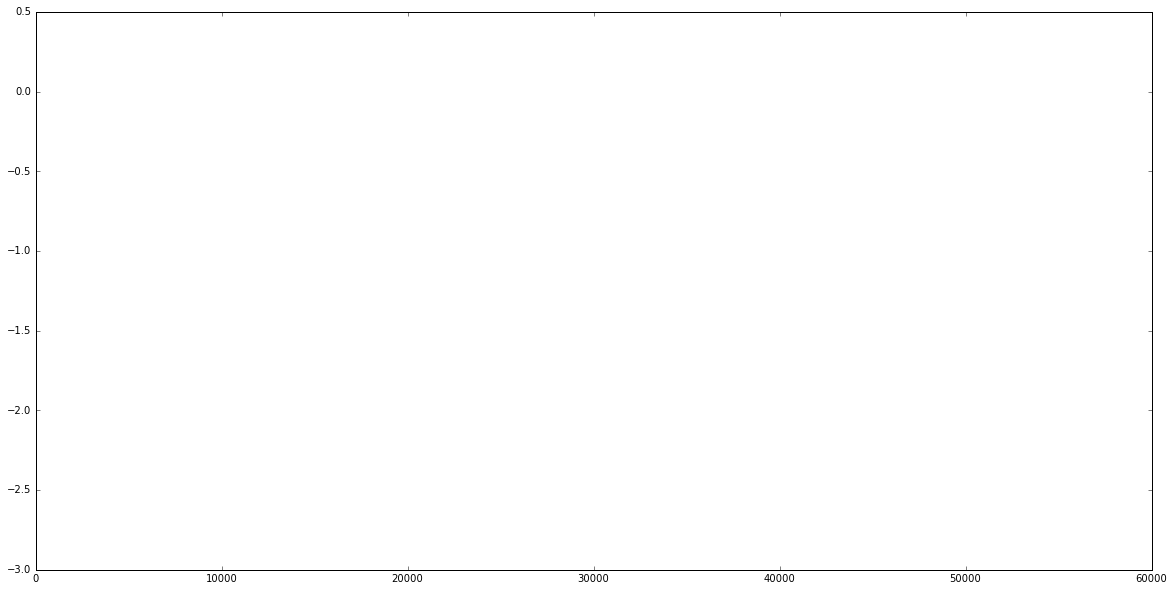

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGraph= GlaphDataTimePath+'DataName'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)

        #window = processing.LoadDicDataFromFileNPZ(StudyDataPath+SaveFileNameTrain)
        window = processing.LoadDicDataFromFileNPZ(WindowDataPath+SaveFileNameTrain)
        wind = window.reshape(window.size,1)
        reconstructData = processing.LoadDicDataFromFileNPZ(StudyDataPath+SaveFileNameDecord)
        reconst = reconstructData.reshape(reconstructData.size,1)
        width=wind.size/20 # graph width 
        for i in range(width, wind.size, width):
            start =i-width 
            goal=i

            dataE = wind[start:goal]
            dataD = reconst[start:goal]

            ax.plot(range(0,len(dataE)),dataE,'r',label="raw data")
            ax.plot(range(0,len(dataD)),dataD,'b',label="reconstruct")
            ax.legend(loc='best',fontsize=10)
            ax.set_title(str(start)+"-"+str(goal))
            ax.figure.savefig(SaveFileNameGraph+'-'+str(start)+"-"+str(goal)+'-glaph')
            ax.clear()
            print 'Graph range='+str(start)+' : '+str(goal)
            time.sleep(5)

In [6]:
print "finish"

finish
